## Customer Personality:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("default")

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
custom_palette = ["#FFCF96", "#FF8080", "#76ABAE", "#CDFAD5", "#A1EEBD"]
sns.set_palette(custom_palette)

In [3]:
df = pd.read_csv("C:\\Users\\warad\\Downloads\\archive (8)\\marketing_campaign.csv", sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.drop(columns=['ID'], inplace=True)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.shape

(2240, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [7]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### We proceed to handle Null data in the Income column based on the Education and Marital Status

In [8]:
missing = df.groupby(['Education', 'Marital_Status'])['Income'].transform("mean").round(0)

df['Income'].fillna(missing, inplace=True)

In [9]:
df.isna().sum().any()

False

#### To change the Year_Birth column to the age of the customer

In [10]:
Age = []
Year = 2016
for item in df['Year_Birth']:
    Age.append(Year - item)
    
df.insert(0, 'Age', Age)

df = df.drop(columns='Year_Birth')
df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,59,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,62,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,51,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,32,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,35,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


#### We examine the distribution of values of the two columns Age and Income, from which we can consider removing outliers

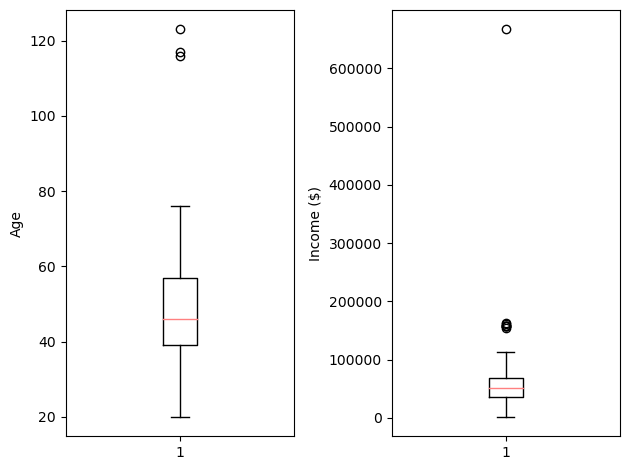

In [11]:
fig, axes = plt.subplots(1, 2)

axes[0].boxplot(df['Age'])
axes[0].set_ylabel('Age')

axes[1].boxplot(df['Income'])
axes[1].set_ylabel('Income ($)')

plt.tight_layout()
plt.show()

In [12]:
df = df[df['Age'] <= 100]
df = df[df['Income'] <= 300000]

#### Education Column Review

In [13]:
df['Education'].value_counts()

Education
Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64

In [14]:
PostGrad = []
for item in df['Education']:
    if item == 'Master' or item == 'PhD':
        PostGrad.append(1)
    else:
        PostGrad.append(0)
        
df.insert(1, 'PostGrad', PostGrad)
df = df.drop(columns='Education')
df.head()

,Age,PostGrad,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,59,0,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,62,0,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,51,0,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,32,0,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,35,1,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


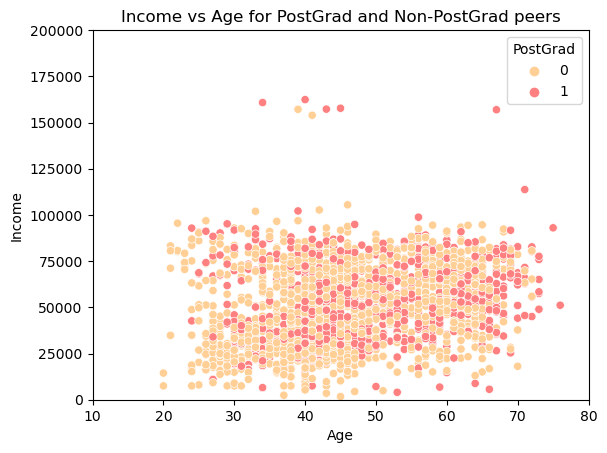

In [15]:
sns.scatterplot(x='Age', y='Income', hue='PostGrad', data=df, palette=custom_palette)
plt.title('Income vs Age for PostGrad and Non-PostGrad peers')
plt.xlim((10, 80))
plt.ylim((0, 200000))
plt.show()

#### Marital_Status Column Review

In [16]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    578
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [17]:
Couple = []
for item in df['Marital_Status']:
    if item == 'Together' or item == 'Married':
        Couple.append(1)
    else:
        Couple.append(0)
        
df.insert(2, 'Couple', Couple)
df = df.drop(columns='Marital_Status')

df.head()

,Age,PostGrad,Couple,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,59,0,0,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,62,0,0,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,51,0,1,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,32,0,1,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,35,1,1,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


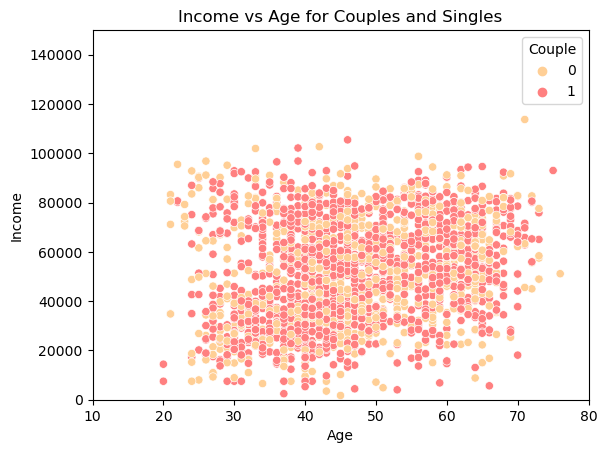

In [18]:
sns.scatterplot(x='Age', y='Income', hue='Couple', data=df, palette=custom_palette)
plt.title('Income vs Age for Couples and Singles')
plt.xlim((10, 80))
plt.ylim((0, 150000))
plt.show()

#### Combining two columns

In [19]:
Offsprings = df['Kidhome'] + df['Teenhome']

df.insert(4, 'Offsprings', Offsprings)
df = df.drop(columns=['Kidhome', 'Teenhome'])

df.head()

,Age,PostGrad,Couple,Income,Offsprings,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,59,0,0,58138.0,0,04-09-2012,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,62,0,0,46344.0,2,08-03-2014,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,51,0,1,71613.0,0,21-08-2013,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,32,0,1,26646.0,1,10-02-2014,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,35,1,1,58293.0,1,19-01-2014,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0


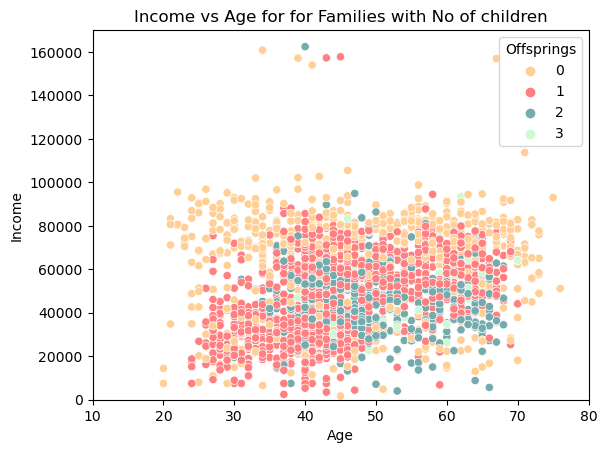

In [20]:
sns.scatterplot(x='Age', y='Income', hue='Offsprings', data=df, palette=custom_palette)
plt.title('Income vs Age for for Families with No of children')
plt.xlim((10, 80))
plt.ylim((0, 170000))
plt.show()

#### We will proceed to transform the Dt_Customer column to find out CustomerAge - the duration a customer has been a member of the system”

In [21]:
datetimeDf = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

print('The first customer is:', datetimeDf.min())
print('The most recent customer is:', datetimeDf.max())
print('The longest associated customer is:', (datetimeDf.max() - datetimeDf.min()).days, 'days')


The first customer is: 2012-07-30 00:00:00
The most recent customer is: 2014-06-29 00:00:00
The longest associated customer is: 699 days


In [22]:
CustomerAge = []

for item in df['Dt_Customer']:
    CustomerAge.append((datetimeDf.max() - pd.to_datetime(item, format='%d-%m-%Y')).days)
    
df.insert(5, 'CustomerAge', CustomerAge)
df = df.drop(columns='Dt_Customer')

df.head()

,Age,PostGrad,Couple,Income,Offsprings,CustomerAge,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,59,0,0,58138.0,0,663,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,62,0,0,46344.0,2,113,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,51,0,1,71613.0,0,312,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,32,0,1,26646.0,1,139,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,35,1,1,58293.0,1,161,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0


In [23]:
AmountSpent = []
AmountSpent = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df.insert(7, 'AmountSpent', AmountSpent)
df = df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])

df.head()

,Age,PostGrad,Couple,Income,Offsprings,CustomerAge,Recency,AmountSpent,NumDealsPurchases,NumWebPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,59,0,0,58138.0,0,663,58,1617,3,8,...,7,0,0,0,0,0,0,3,11,1
1,62,0,0,46344.0,2,113,38,27,2,1,...,5,0,0,0,0,0,0,3,11,0
2,51,0,1,71613.0,0,312,26,776,1,8,...,4,0,0,0,0,0,0,3,11,0
3,32,0,1,26646.0,1,139,26,53,2,2,...,6,0,0,0,0,0,0,3,11,0
4,35,1,1,58293.0,1,161,94,422,5,5,...,5,0,0,0,0,0,0,3,11,0


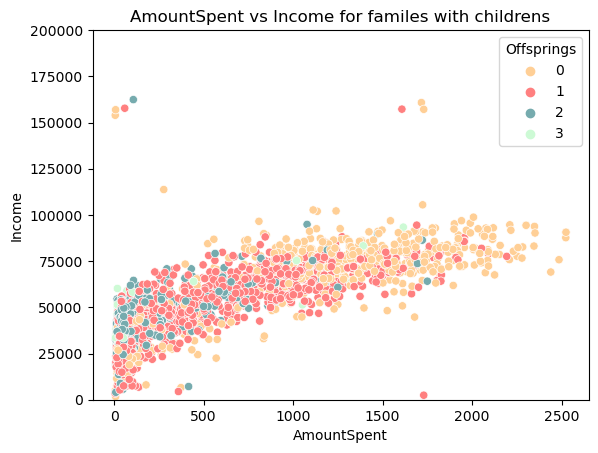

In [24]:
sns.scatterplot(x='AmountSpent', y='Income', hue="Offsprings", data=df, palette=custom_palette)

plt.title('AmountSpent vs Income for familes with childrens')
plt.ylim((0, 200000))

plt.show()

"Remove irrelevant columns

‘AcceptedCmp1’, ‘AcceptedCmp2’, ‘AcceptedCmp3’, ‘AcceptedCmp4’, ‘AcceptedCmp5’: These columns are not very useful when we proceed with clustering. ‘Z_Revenue’, ‘Z_CostContact’: This data is not very realistic. ‘Complain’, ‘Response’: These columns will not be very useful."

In [25]:
columnList = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Z_Revenue', 'Z_CostContact', 'Complain']
df = df.drop(columns=columnList)
df.head()

,Age,PostGrad,Couple,Income,Offsprings,CustomerAge,Recency,AmountSpent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,59,0,0,58138.0,0,663,58,1617,3,8,10,4,7
1,62,0,0,46344.0,2,113,38,27,2,1,1,2,5
2,51,0,1,71613.0,0,312,26,776,1,8,2,10,4
3,32,0,1,26646.0,1,139,26,53,2,2,0,4,6
4,35,1,1,58293.0,1,161,94,422,5,5,3,6,5


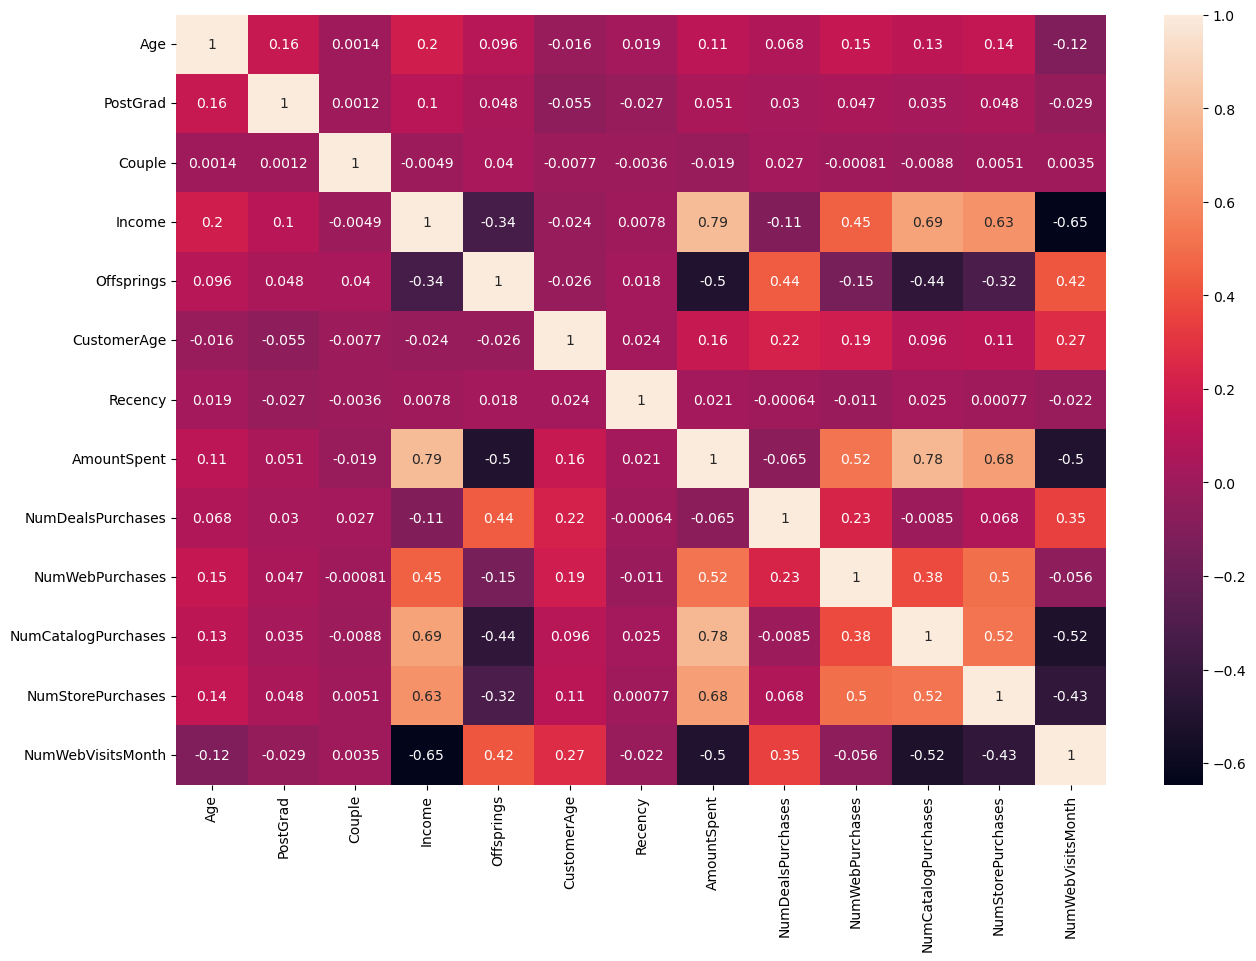

In [26]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, OPTICS
import hdbscan

In [28]:
temp = df.copy()

In [29]:
dbscan = DBSCAN(eps=900, min_samples=10)
dbscan_label = dbscan.fit_predict(temp)

df['Cluster_DBSCAN'] = dbscan_label
print(df['Cluster_DBSCAN'].value_counts())
df.head()

Cluster_DBSCAN
 0    2140
-1      46
 2      33
 1      17
Name: count, dtype: int64


,Age,PostGrad,Couple,Income,Offsprings,CustomerAge,Recency,AmountSpent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cluster_DBSCAN
0,59,0,0,58138.0,0,663,58,1617,3,8,10,4,7,0
1,62,0,0,46344.0,2,113,38,27,2,1,1,2,5,0
2,51,0,1,71613.0,0,312,26,776,1,8,2,10,4,0
3,32,0,1,26646.0,1,139,26,53,2,2,0,4,6,0
4,35,1,1,58293.0,1,161,94,422,5,5,3,6,5,0


In [30]:
print(silhouette_score(temp, dbscan_label))

0.07975296975367724


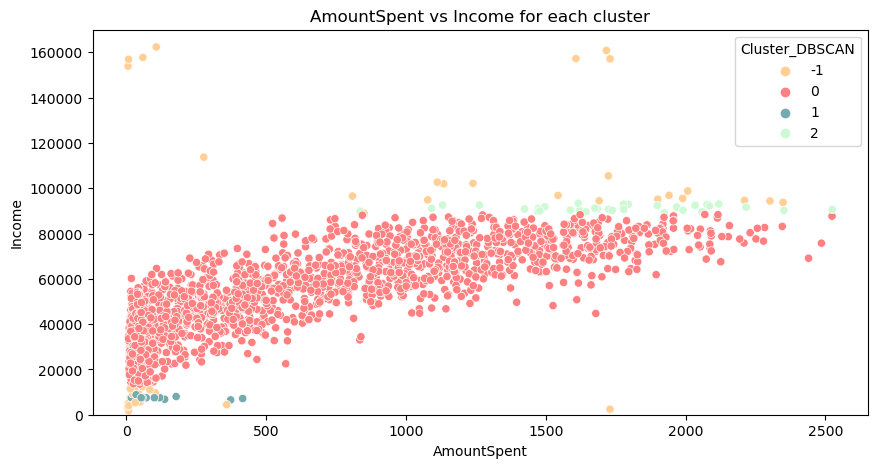

In [31]:
plt.figure(figsize=(10,5))

sns.scatterplot(x='AmountSpent', y='Income', hue="Cluster_DBSCAN", data=df, palette=custom_palette)
plt.title('AmountSpent vs Income for each cluster')
plt.ylim((0, 170000))

plt.show()

In [32]:
hdb = hdbscan.HDBSCAN(min_cluster_size=8)
hdb_label = hdb.fit_predict(temp)

df['Cluster_HDBSCAN'] = hdb_label
print(df['Cluster_HDBSCAN'].value_counts())
df.head()

Cluster_HDBSCAN
 2    2136
-1      45
 1      34
 0      21
Name: count, dtype: int64


,Age,PostGrad,Couple,Income,Offsprings,CustomerAge,Recency,AmountSpent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cluster_DBSCAN,Cluster_HDBSCAN
0,59,0,0,58138.0,0,663,58,1617,3,8,10,4,7,0,2
1,62,0,0,46344.0,2,113,38,27,2,1,1,2,5,0,2
2,51,0,1,71613.0,0,312,26,776,1,8,2,10,4,0,2
3,32,0,1,26646.0,1,139,26,53,2,2,0,4,6,0,2
4,35,1,1,58293.0,1,161,94,422,5,5,3,6,5,0,2


In [33]:
print(silhouette_score(temp, hdb_label))

0.08002739240907217


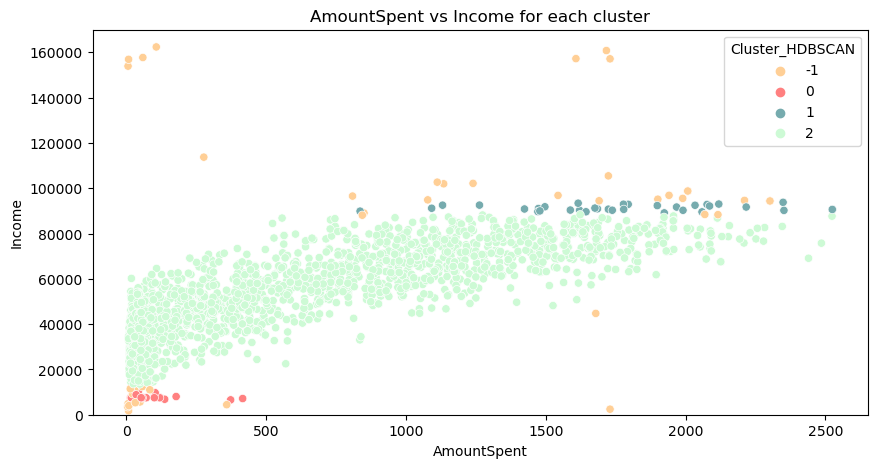

In [34]:
plt.figure(figsize=(10,5))

sns.scatterplot(x='AmountSpent', y='Income', hue="Cluster_HDBSCAN", data=df, palette=custom_palette)
plt.title('AmountSpent vs Income for each cluster')
plt.ylim((0,170000))
plt.savefig('HDBSCAN.png')
plt.show()

In [35]:
optics = OPTICS(min_cluster_size=80)
optics_label = optics.fit_predict(temp)

df['Cluster_OPTICS'] = optics_label
print(df['Cluster_OPTICS'].value_counts())
df.head()

Cluster_OPTICS
-1    1977
 0      93
 1      85
 2      81
Name: count, dtype: int64


,Age,PostGrad,Couple,Income,Offsprings,CustomerAge,Recency,AmountSpent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cluster_DBSCAN,Cluster_HDBSCAN,Cluster_OPTICS
0,59,0,0,58138.0,0,663,58,1617,3,8,10,4,7,0,2,-1
1,62,0,0,46344.0,2,113,38,27,2,1,1,2,5,0,2,0
2,51,0,1,71613.0,0,312,26,776,1,8,2,10,4,0,2,-1
3,32,0,1,26646.0,1,139,26,53,2,2,0,4,6,0,2,-1
4,35,1,1,58293.0,1,161,94,422,5,5,3,6,5,0,2,-1


In [36]:
print(silhouette_score(temp, optics_label))

-0.2555685466506084


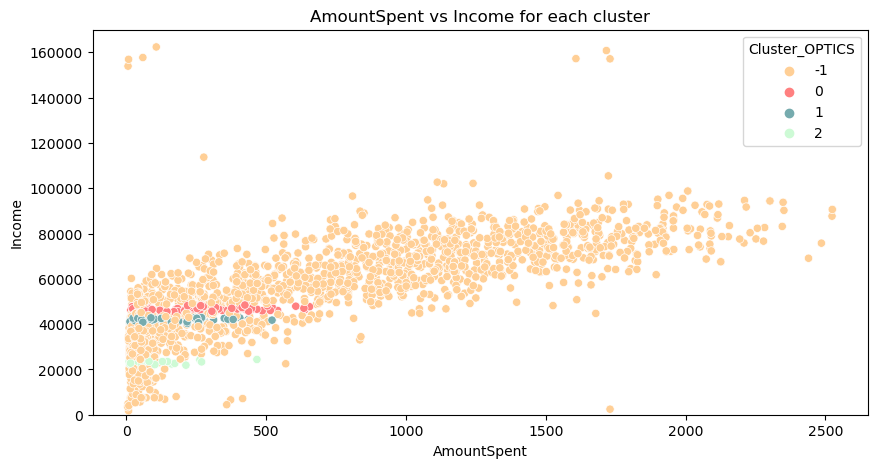

In [37]:
plt.figure(figsize=(10,5))

sns.scatterplot(x='AmountSpent', y='Income', hue="Cluster_OPTICS", data=df, palette=custom_palette)
plt.title('AmountSpent vs Income for each cluster')
plt.ylim((0,170000))

plt.show()

From the three models above, we see that the HDBSCAN model achieves the most optimal performance. Based on the clustering graph we have drawn, we can divide the data into 3 groups:

Group 1: Group with low income and low spending Group 2: Group with average income and average spending Group 3: Group with high income and high spending"

This indicates an analysis of clustering models where HDBSCAN is identified as the best performing model, and the data is categorized into three distinct groups based on income and expenditure levels.

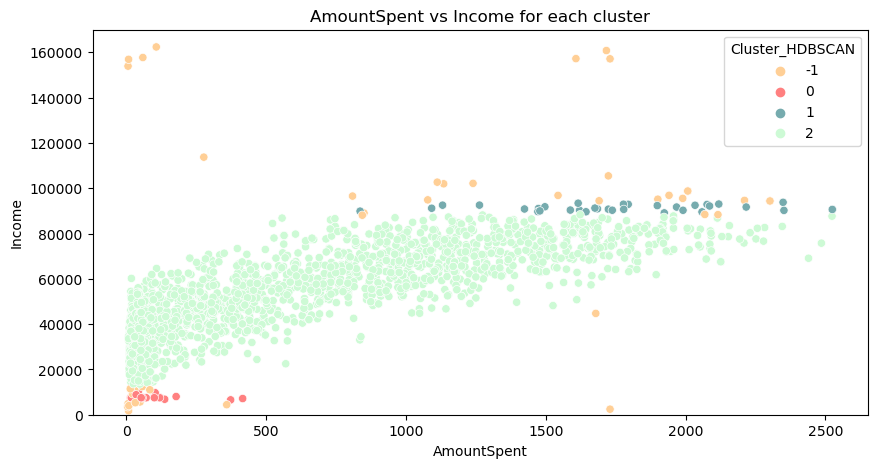

In [38]:
plt.figure(figsize=(10,5))

sns.scatterplot(x='AmountSpent', y='Income', hue="Cluster_HDBSCAN", data=df, palette=custom_palette)
plt.title('AmountSpent vs Income for each cluster')
plt.ylim((0,170000))
plt.savefig('HDBSCAN.png')
plt.show()

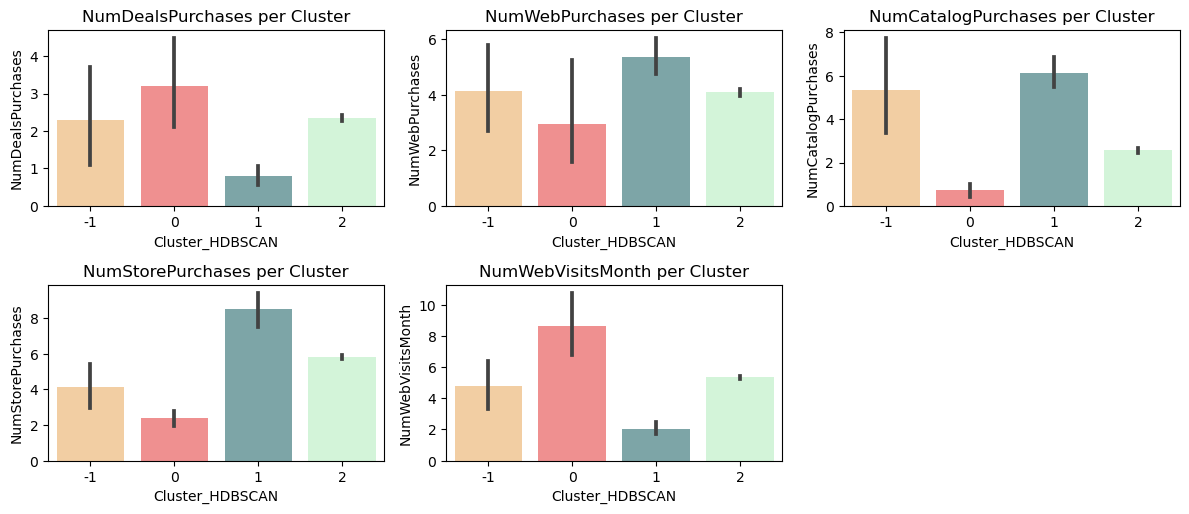

In [39]:
plt.subplots(figsize=(12, 15))

columnList = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

for i, column in enumerate(df[columnList].columns):
    plt.subplot(len(df.columns)//3 + 1, 3, i+1,)
    sns.barplot(x= 'Cluster_HDBSCAN' , y=column, data=df, palette=custom_palette)
    plt.title(column + " per Cluster")
    plt.tight_layout()

plt.show()

We can see that Group 0, despite having a high number of web visits, does not have a high purchasing power, and the opposite is observed in Group 1 (which can be easily understood).”

This statement likely pertains to an analysis of web traffic and purchasing behavior, indicating that web visits do not necessarily correlate with high purchasing power for Group 0, while Group 1 shows a different trend.

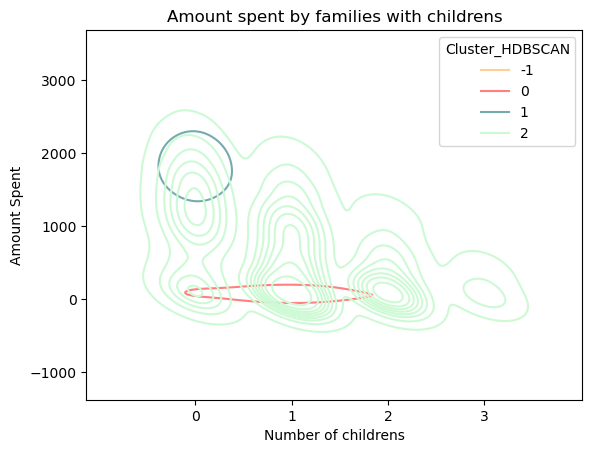

In [40]:
plt.xticks(np.arange(0, 4, 1))

sns.kdeplot(x='Offsprings', y='AmountSpent', hue="Cluster_HDBSCAN", data=df, palette=custom_palette)

plt.title('Amount spent by families with childrens')
plt.xlabel('Number of childrens')
plt.ylabel('Amount Spent')

plt.show()